In [5]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import absolute_import
from __future__ import division
from random import shuffle
from random import seed

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import adjusted_rand_score

from concept_formation.cobweb import CobwebTree
from concept_formation.cluster import cluster
from concept_formation.datasets import load_mushroom
from concept_formation.visualize import visualize_clusters

seed(0)
mushrooms = load_mushroom()
shuffle(mushrooms)
mushrooms = mushrooms[:150]

print("Length: {}".format(len(mushrooms)))
mushrooms[0]

Length: 150


{'bruises?': 'no',
 'cap-color': 'brown',
 'cap-shape': 'flat',
 'cap-surface': 'smooth',
 'classification': 'poisonous',
 'gill-attachment': 'free',
 'gill-color': 'buff',
 'gill-size': 'narrow',
 'gill-spacing': 'closed',
 'habitat': 'paths',
 'odor': 'spicy',
 'population': 'several',
 'ring-number': 'one',
 'ring-type': 'evanescent',
 'spore-print-color': 'white',
 'stalk-color-above-ring': 'white',
 'stalk-color-below-ring': 'white',
 'stalk-shape': 'tapering',
 'stalk-surface-above-ring': 'smooth',
 'stalk-surface-below-ring': 'silky',
 'veil-color': 'white',
 'veil-type': 'partial'}

### cluster(..)

In [31]:
tree = CobwebTree()
mushrooms_no_class = [{a: mushroom[a] for a in mushroom if a != 'classification'} for mushroom in mushrooms]
print("N samples: {}".format(len(mushrooms_no_class)))

clusters = next(cluster(tree, mushrooms_no_class))
print("N clusters: {}".format(len(clusters)))
print("unique clusters: {}".format(set(clusters)))
print(clusters)

N samples: 150
N clusters: 150
unique clusters: {'Concept131239', 'Concept130136', 'Concept130740'}
['Concept130136', 'Concept131239', 'Concept131239', 'Concept131239', 'Concept131239', 'Concept130136', 'Concept130136', 'Concept130136', 'Concept130740', 'Concept131239', 'Concept131239', 'Concept131239', 'Concept130136', 'Concept130136', 'Concept131239', 'Concept131239', 'Concept130136', 'Concept131239', 'Concept130136', 'Concept130740', 'Concept130136', 'Concept131239', 'Concept130136', 'Concept130136', 'Concept131239', 'Concept131239', 'Concept130740', 'Concept130740', 'Concept131239', 'Concept131239', 'Concept130740', 'Concept130136', 'Concept131239', 'Concept130740', 'Concept130136', 'Concept131239', 'Concept131239', 'Concept130136', 'Concept131239', 'Concept130136', 'Concept131239', 'Concept130740', 'Concept130136', 'Concept130740', 'Concept130136', 'Concept131239', 'Concept131239', 'Concept131239', 'Concept131239', 'Concept131239', 'Concept131239', 'Concept131239', 'Concept131239'

### fit() and cluster(..,mod=False)

In [32]:
tree2 = CobwebTree()
tree2.fit(mushrooms_no_class)
clusters2 = next(cluster(tree2, mushrooms_no_class, mod=False))
print("N clusters: {}".format(len(clusters2)))
print("unique clusters: {}".format(set(clusters2)))
print(clusters2)

N clusters: 150
unique clusters: {'Concept141560', 'Concept140990', 'Concept140804'}
['Concept140804', 'Concept141560', 'Concept141560', 'Concept141560', 'Concept141560', 'Concept140804', 'Concept141560', 'Concept140804', 'Concept140990', 'Concept141560', 'Concept141560', 'Concept141560', 'Concept140804', 'Concept140804', 'Concept141560', 'Concept141560', 'Concept140804', 'Concept141560', 'Concept140804', 'Concept140990', 'Concept140804', 'Concept141560', 'Concept140804', 'Concept140804', 'Concept141560', 'Concept141560', 'Concept140990', 'Concept140990', 'Concept141560', 'Concept141560', 'Concept140990', 'Concept140804', 'Concept141560', 'Concept140990', 'Concept140804', 'Concept141560', 'Concept141560', 'Concept140804', 'Concept141560', 'Concept140804', 'Concept141560', 'Concept140990', 'Concept140804', 'Concept140990', 'Concept140804', 'Concept141560', 'Concept141560', 'Concept141560', 'Concept141560', 'Concept141560', 'Concept141560', 'Concept141560', 'Concept141560', 'Concept14156

In [7]:
visualize_clusters(tree, clusters)

In [16]:
print("Number of concepts contained below the current node: {}".format(tree.root.num_concepts()))

Number of concepts contained below the current node: 1


In [18]:
mushroom_class = [mushroom[a] for mushroom in mushrooms for a in mushroom if a == 'classification']
print(mushroom_class)
# ari = Rand index adjusted for chance.
# The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
# The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:
# ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
# The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).
ari = adjusted_rand_score(clusters, mushroom_class)
ari

['poisonous', 'edible', 'edible', 'edible', 'edible', 'poisonous', 'edible', 'poisonous', 'poisonous', 'edible', 'edible', 'edible', 'poisonous', 'poisonous', 'edible', 'edible', 'poisonous', 'edible', 'poisonous', 'poisonous', 'poisonous', 'edible', 'poisonous', 'poisonous', 'edible', 'edible', 'poisonous', 'poisonous', 'poisonous', 'edible', 'poisonous', 'poisonous', 'edible', 'poisonous', 'poisonous', 'edible', 'edible', 'poisonous', 'edible', 'poisonous', 'edible', 'poisonous', 'poisonous', 'poisonous', 'poisonous', 'edible', 'edible', 'edible', 'edible', 'poisonous', 'edible', 'edible', 'edible', 'edible', 'poisonous', 'poisonous', 'edible', 'poisonous', 'edible', 'poisonous', 'poisonous', 'poisonous', 'poisonous', 'edible', 'edible', 'poisonous', 'edible', 'edible', 'edible', 'edible', 'edible', 'poisonous', 'edible', 'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous', 'edible', 'poisonous', 'poisonous', 'edible', 'poisonous', 'edible', 'poisonous', 'poisonous', 'poi

0.4529206148714183

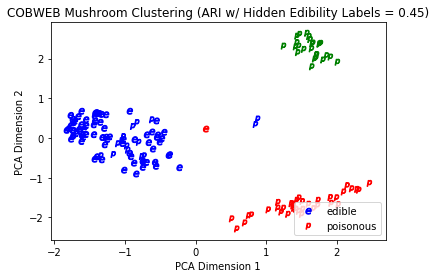

In [22]:
dv = DictVectorizer(sparse=False)
mushroom_X = dv.fit_transform(mushrooms_no_class)
pca = PCA(n_components=2)
mushroom_2d_x = pca.fit_transform(mushroom_X)
mushroom_2d_x

colors = ['b', 'g', 'r', 'y', 'k', 'c', 'm']
clust_set = {v:i for i,v in enumerate(list(set(clusters)))}
class_set = {v:i for i,v in enumerate(list(set(mushroom_class)))}

for class_idx, class_label in enumerate(class_set):
    x = [v[0] for i,v in enumerate(mushroom_2d_x) if mushroom_class[i] == class_label]
    y = [v[1] for i,v in enumerate(mushroom_2d_x) if mushroom_class[i] == class_label]
    c = [colors[clust_set[clusters[i]]] for i,v in enumerate(mushroom_2d_x) if
         mushroom_class[i] == class_label]
    plt.scatter(x, y, color=c, marker=r"$ {} $".format(class_label[0]), label=class_label)

plt.title("COBWEB Mushroom Clustering (ARI w/ Hidden Edibility Labels = %0.2f)" % (ari))
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(loc=4)
plt.show()

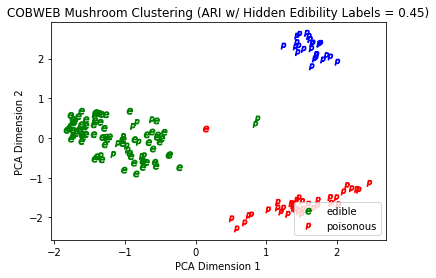

In [38]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import absolute_import
from __future__ import division
from random import shuffle
from random import seed

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import adjusted_rand_score

from concept_formation.cobweb import CobwebTree
from concept_formation.cluster import cluster
from concept_formation.datasets import load_mushroom
from concept_formation.visualize import visualize_clusters


seed(0)
mushrooms = load_mushroom()
shuffle(mushrooms)
mushrooms = mushrooms[:150]

tree = CobwebTree()
mushrooms_no_class = [{a: mushroom[a] for a in mushroom
                       if a != 'classification'} for mushroom in mushrooms]
clusters = next(cluster(tree, mushrooms_no_class))
mushroom_class = [mushroom[a] for mushroom in mushrooms for a in mushroom
                  if a == 'classification']
ari = adjusted_rand_score(clusters, mushroom_class)

visualize_clusters(tree, clusters)

dv = DictVectorizer(sparse=False)
mushroom_X = dv.fit_transform(mushrooms_no_class)

pca = PCA(n_components=2)
mushroom_2d_x = pca.fit_transform(mushroom_X)

colors = ['b', 'g', 'r', 'y', 'k', 'c', 'm']
clust_set = {v:i for i,v in enumerate(list(set(clusters)))}
class_set = {v:i for i,v in enumerate(list(set(mushroom_class)))}

for class_idx, class_label in enumerate(class_set):
    x = [v[0] for i,v in enumerate(mushroom_2d_x) if mushroom_class[i] == class_label]
    y = [v[1] for i,v in enumerate(mushroom_2d_x) if mushroom_class[i] == class_label]
    c = [colors[clust_set[clusters[i]]] for i,v in enumerate(mushroom_2d_x) if
         mushroom_class[i] == class_label]
    plt.scatter(x, y, color=c, marker=r"$ {} $".format(class_label[0]), label=class_label)

plt.title("COBWEB Mushroom Clustering (ARI w/ Hidden Edibility Labels = %0.2f)" % (ari))
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(loc=4)
plt.show()